# Random Fields

abalone
Total: 4177 | Obs: 125 (2.9925784055542257%)


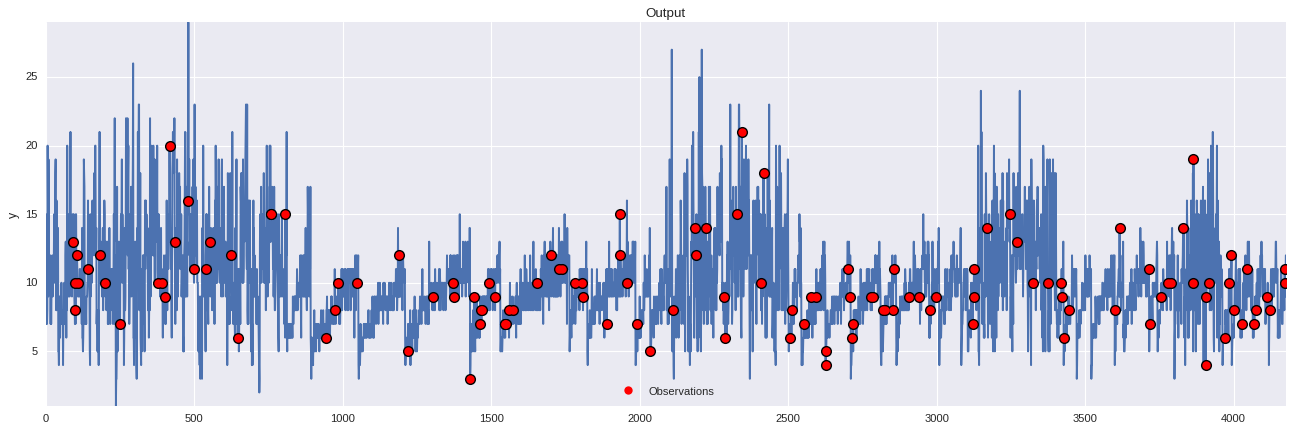

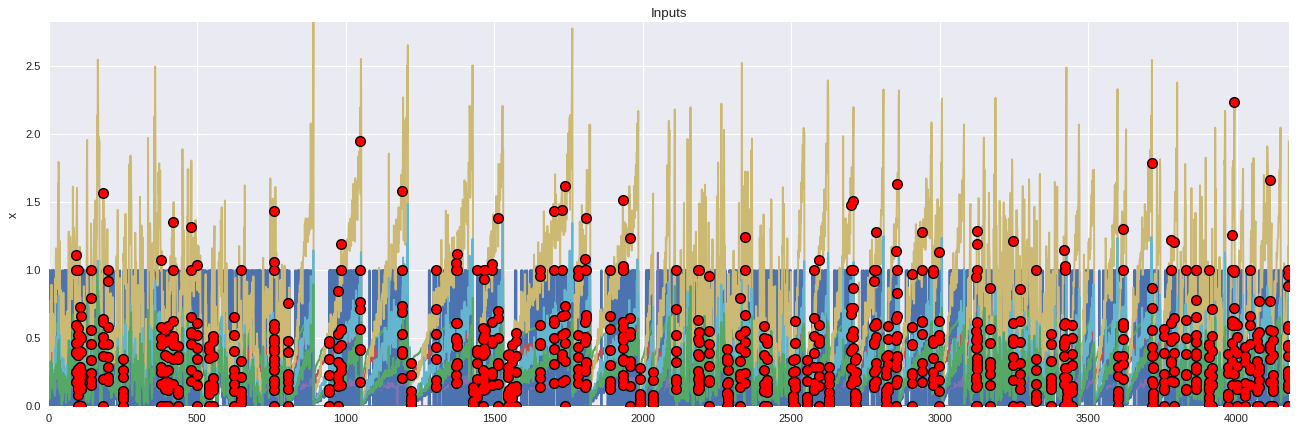

In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2
%matplotlib inline

import g3py as g3

g3.style_seaborn()

psamples = 0.03
random = True

x, y = g3.data_abalone()
if random:
    obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, plot=True)
else:
    obs_j = np.array([  37,   62,   86,  124,  141,  144,  170,  215,  217,  230,  250,
        272,  378,  421,  528,  598,  608,  654,  798,  803,  806,  830,
        945,  959,  967,  972, 1032, 1049, 1050, 1053, 1070, 1077, 1078,
       1083, 1100, 1163, 1230, 1285, 1289, 1323, 1354, 1355, 1381, 1443,
       1445, 1490, 1502, 1521, 1531, 1563, 1605, 1612, 1626, 1645, 1680,
       1733, 1764, 1800, 1818, 1841, 1992, 2016, 2198, 2305, 2312, 2377,
       2381, 2408, 2452, 2501, 2506, 2513, 2540, 2641, 2695, 2728, 2733,
       2754, 2793, 2820, 2846, 2900, 2928, 2934, 2935, 2965, 2985, 3008,
       3009, 3049, 3085, 3107, 3161, 3277, 3287, 3304, 3326, 3327, 3344,
       3365, 3387, 3414, 3417, 3425, 3543, 3557, 3584, 3620, 3630, 3652,
       3673, 3699, 3781, 3856, 3858, 3897, 3957, 4042, 4054, 4056, 4066,
       4085, 4095, 4148, 4149])

## Prior Random Fields

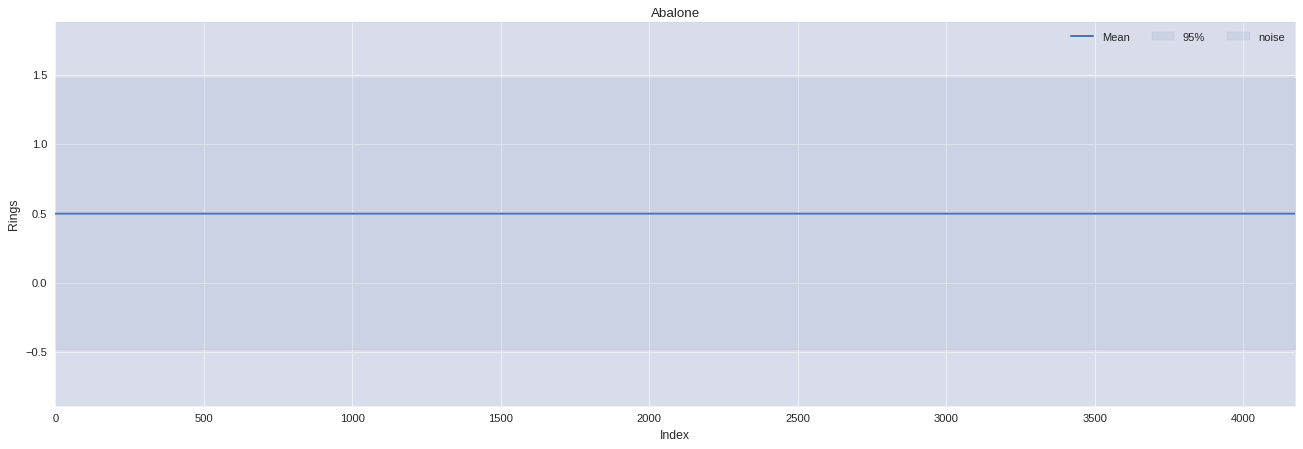

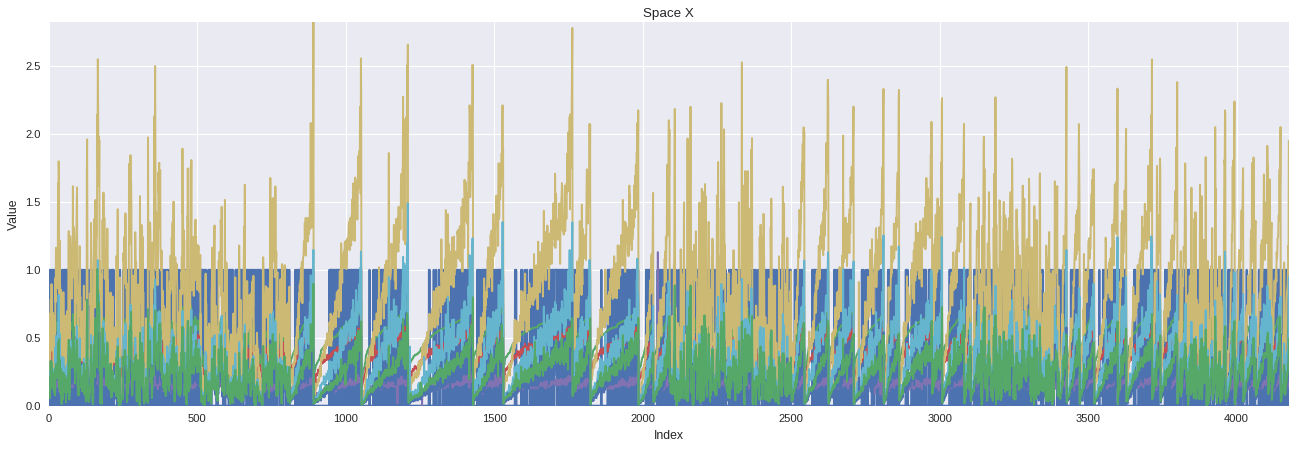

In [2]:
gp = g3.WGP(space=x, location=g3.Bias(), kernel=g3.SE(), mapping=g3.BoxCoxLinear(), noisy=True)
gp.describe('Abalone','Index','Rings')
gp.plot(plot_space=True)

## Posterior Random Fields

{'WGP_Bias_Bias': 9.8240004,
 'WGP_BoxCoxLinear_power_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_shift': 1.0,
 'WGP_Noise_var_log_': array(2.27839732170105, dtype=float32),
 'WGP_SE_rate_log_': array([ 0.10178275,  1.44508588,  1.59462857,  2.49202824,  0.04589209,
         0.86790383,  1.54581976,  1.29036832], dtype=float32),
 'WGP_SE_var_log_': array(2.27839732170105, dtype=float32),
 '_l1': 1.6763487,
 '_l2': 5.4927931,
 '_ll': array(-301.6383056640625, dtype=float32)}

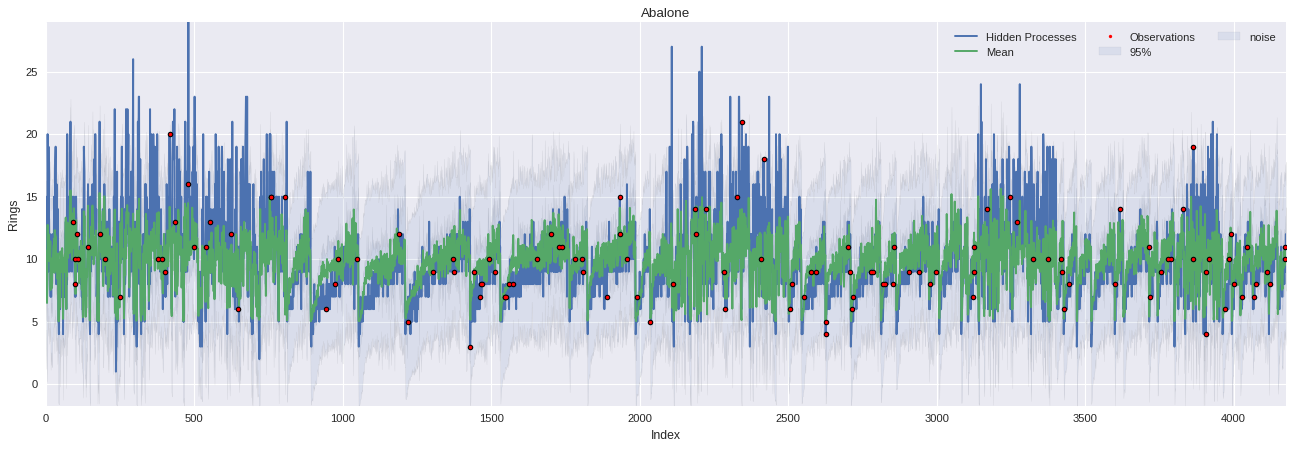

In [3]:
gp.observed(inputs=x_obs, outputs=y_obs, index=obs_j, hidden=y)
gp.plot()
gp.eval_params(gp.params)

In [4]:
gp.widget()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Find MAP

In [5]:
params = gp.find_MAP(points=4)

'Starting function value (-logp): 301.638'
'start_bfgs'
         Current function value: 246.879440
         Iterations: 46
         Function evaluations: 105
         Gradient evaluations: 93
'start_powell'
Optimization terminated successfully.
         Current function value: 258.622681
         Iterations: 27
         Function evaluations: 5791
'start_bfgs_powell'
Optimization terminated successfully.
         Current function value: 246.877396
         Iterations: 1
         Function evaluations: 349
'start_powell_bfgs'
         Current function value: 258.622681
         Iterations: 0
         Function evaluations: 29
         Gradient evaluations: 17
{'WGP_Bias_Bias': array(14.978452682495117, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-6.022943019866943, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(14.149736404418945, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.411241054534912, dtype=float32),
 'WGP_Noise_var_log_': array(-2.9300100803375244, dtype=fl

{'WGP_Bias_Bias': array(14.978452682495117, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-6.022943019866943, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(14.149736404418945, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.411241054534912, dtype=float32),
 'WGP_Noise_var_log_': array(-2.9300100803375244, dtype=float32),
 'WGP_SE_rate_log_': array([-3.45015335,  1.210518  , -0.03252275, -9.1194458 , -8.03981972,
        -0.35251978, -9.46508694,  0.42173785], dtype=float32),
 'WGP_SE_var_log_': array(1.466822862625122, dtype=float32),
 '_l1': 1.5885452,
 '_l2': 5.0059261,
 '_ll': array(-246.8773956298828, dtype=float32)}

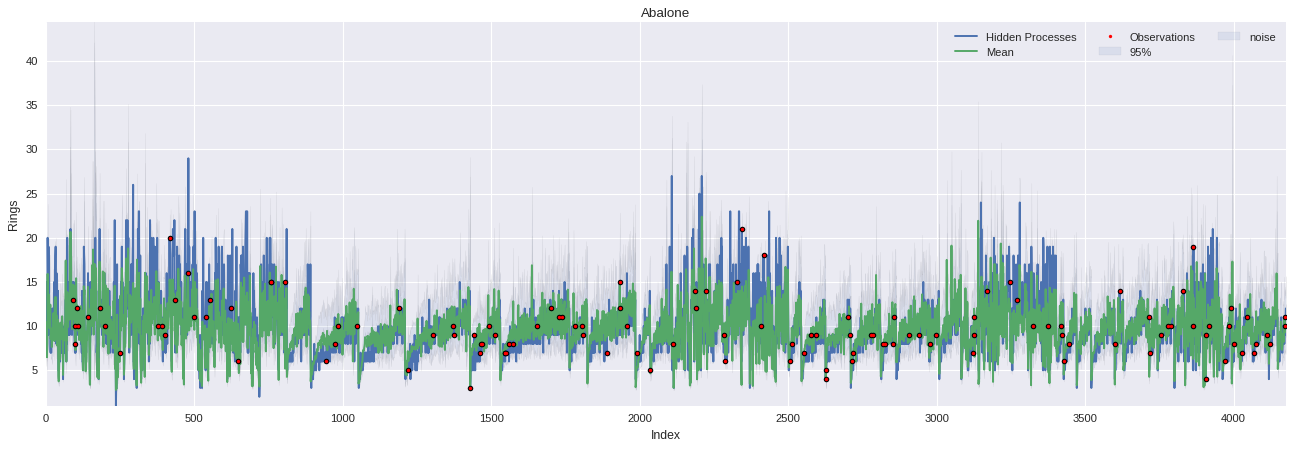

In [6]:
gp.plot(params)
gp.eval_params(params)

## Sampling Hyperparameters with Ensemble MCMC

In [7]:
file = 'datatrace_random_fields.h5'
try:
    datatrace = g3.load_datatrace(file)
except:
    datatrace = gp.sample_hypers(start=params, samples=10000)
    g3.save_datatrace(datatrace, file)
datatrace

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
0                         -0.816940                     0.423403   
1                         -0.816940                     0.423403   
2                         -0.816940                     0.423403   
3                         -0.816940                     0.423403   
4                         -0.816940                     0.423403   
5                         -0.816940                     0.423403   
6                         -0.816940                     0.423403   
7                         -0.816940                     0.423403   
8                         -0.816940                     0.423403   
9                         -0.816940                     0.423403   
10                        -0.816940                     0.423403   
11                        -0.816940                     0.423403   
12                        -0.816940                     0.423403   
13                        -0.816940                     0.423403   
14                        -0.725936                     0.535199   
15                        -0.746762                     0.547192   
16                        -0.746762                     0.547192   
17                        -0.746762                     0.547192   
18                        -0.746762                     0.547192   
19                        -0.746762                     0.547192   
20                        -0.746762                     0.547192   
21                        -0.746762                     0.547192   
22                        -0.746762                     0.547192   
23                        -0.770043                     0.582861   
24                        -0.770043                     0.582861   
25                        -0.770043                     0.582861   
26                        -0.770043                     0.582861   
27                        -0.770043                     0.582861   
28                        -0.770043                     0.582861   
29                        -0.770043                     0.582861   
...                             ...                          ...   
279970                    -2.891044                     3.516343   
279971                    -3.174083                     3.956374   
279972                    -3.174083                     3.956374   
279973                    -3.174083                     3.956374   
279974                    -3.132126                     3.893276   
279975                    -3.132126                     3.893276   
279976                    -3.058253                     3.788998   
279977                    -3.058253                     3.788998   
279978                    -3.058253                     3.788998   
279979                    -3.058253                     3.788998   
279980                    -3.058253                     3.788998   
279981                    -3.058253                     3.788998   
279982                    -3.058253                     3.788998   
279983                    -3.058253                     3.788998   
279984                    -3.058253                     3.788998   
279985                    -3.058253                     3.788998   
279986                    -3.058253                     3.788998   
279987                    -3.058253                     3.788998   
279988                    -3.058253                     3.788998   
279989                    -3.058253                     3.788998   
279990                    -3.058253                     3.788998   
279991                    -3.058253                     3.788998   
279992                    -3.058253                     3.788998   
279993                    -3.058253                     3.788998   
279994                    -3.058253                     3.788998   
279995                    -3.058253                     3.788998   
279996                    -3.058253                     3.788998

In [ ]:
return
chains = g3.datatrace_to_chains(gp, datatrace[datatrace._niter == datatrace._niter.max()])
dt2 = gp.sample_hypers(start=chains, samples=10000)
dt2._niter += datatrace._niter.max() + 1
datatrace = datatrace.append(dt2, ignore_index=True)
datatrace = datatrace.reset_index()
del datatrace['index']
datatrace._burnin = datatrace._niter > 12000

## Convergene Diagnostic

In [9]:
datatrace._burnin = datatrace._niter > 2000

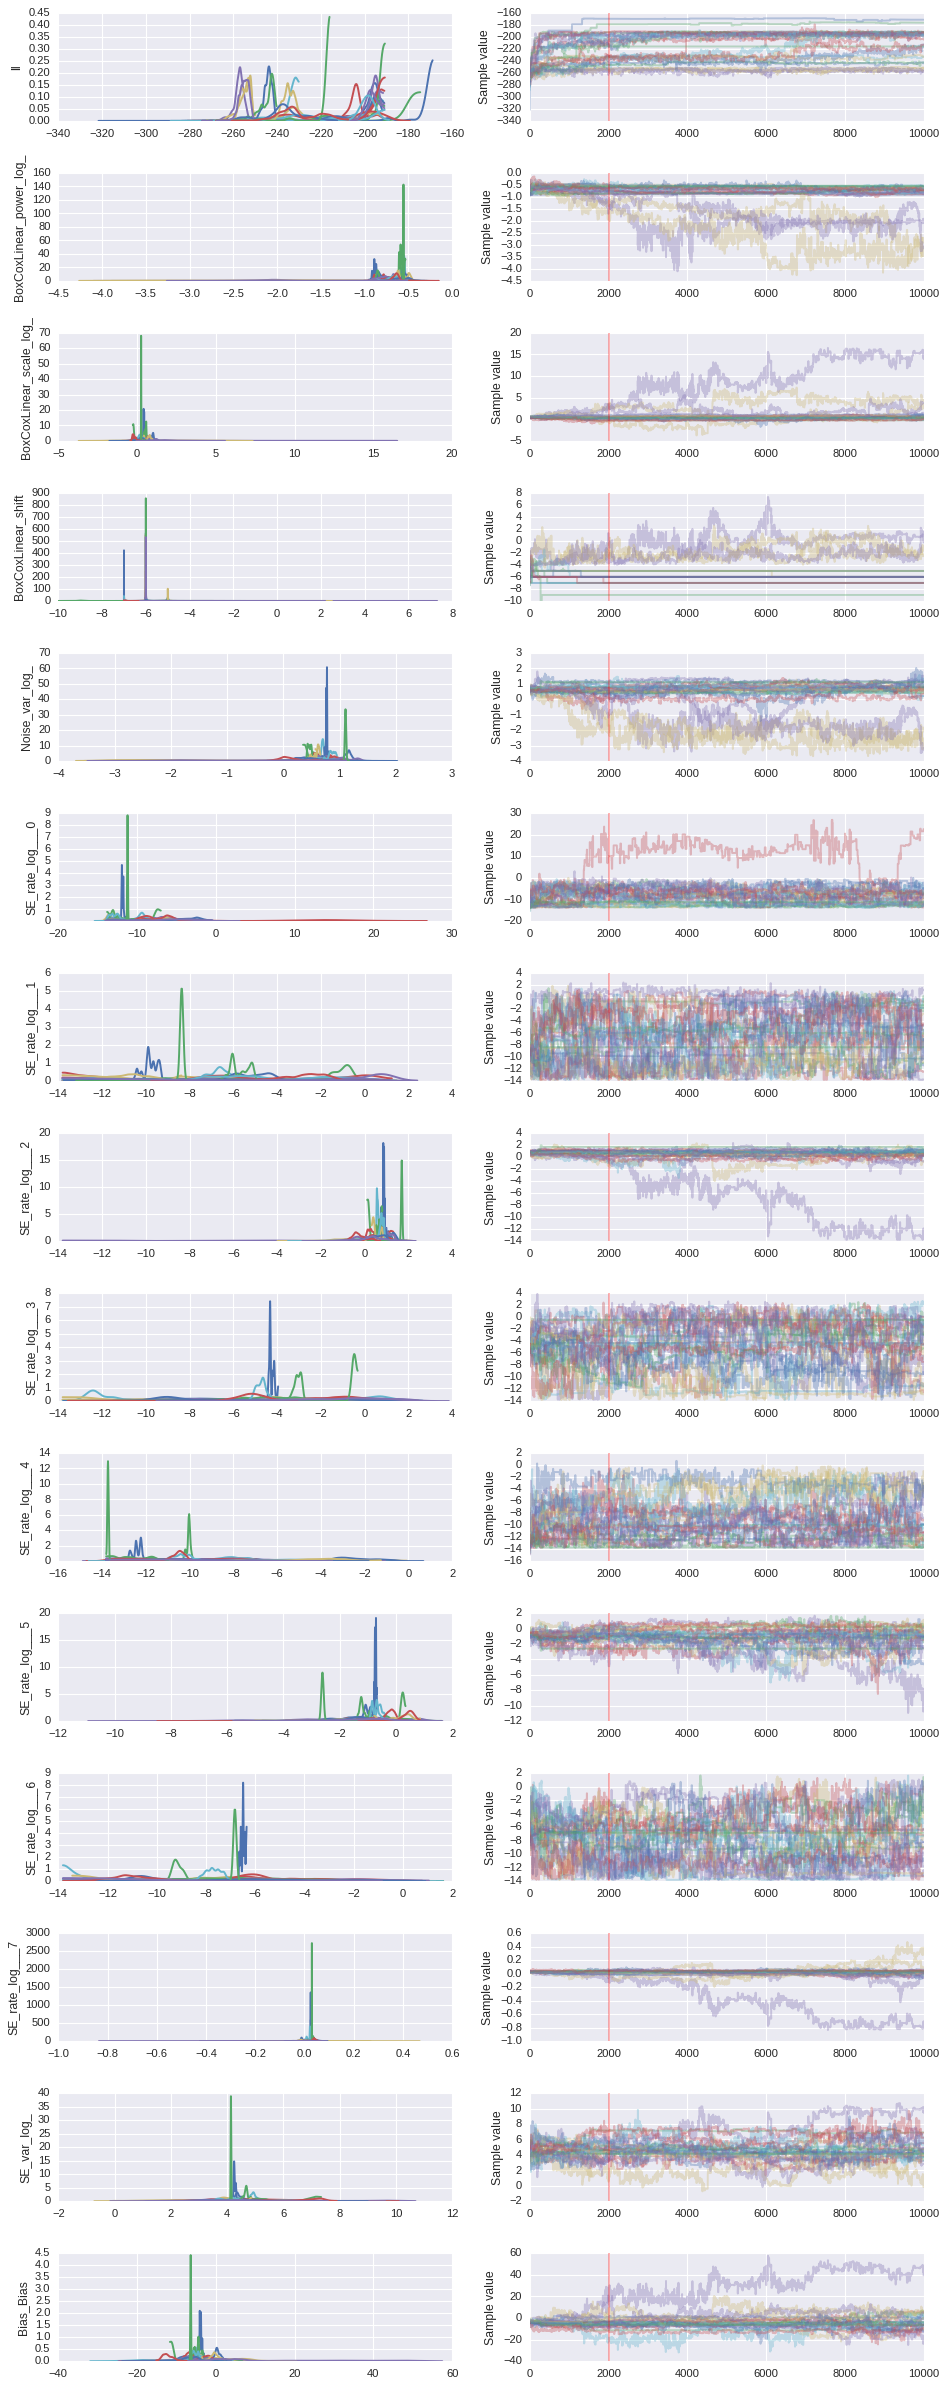

In [10]:
g3.plot_datatrace(datatrace)

## Plot Marginal Histograms

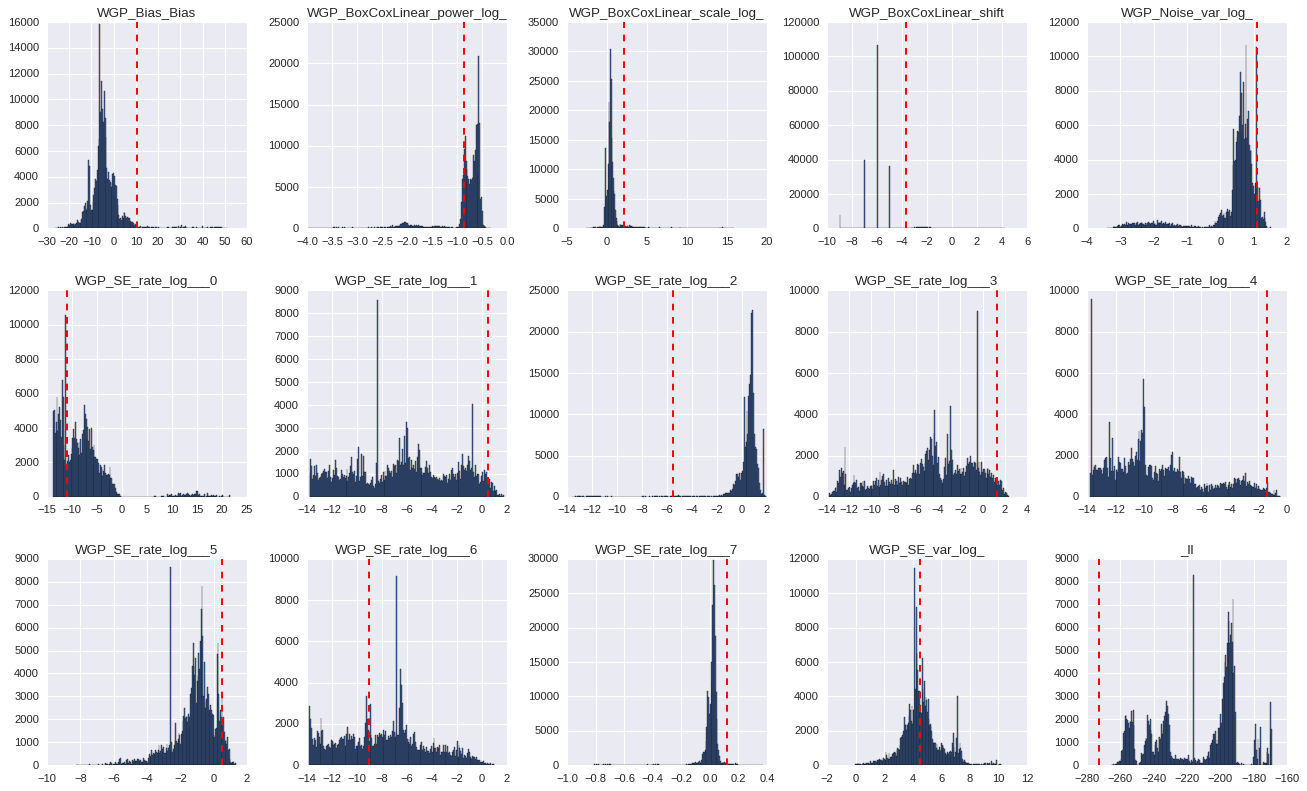

In [11]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

In [12]:
g3.cluster_datatrace(gp, datatrace)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

In [13]:
gp.scores(params=gp.active.params_datatrace(datatrace, 0))

{'_l1': 1.6464041, '_l2': 5.8755732}

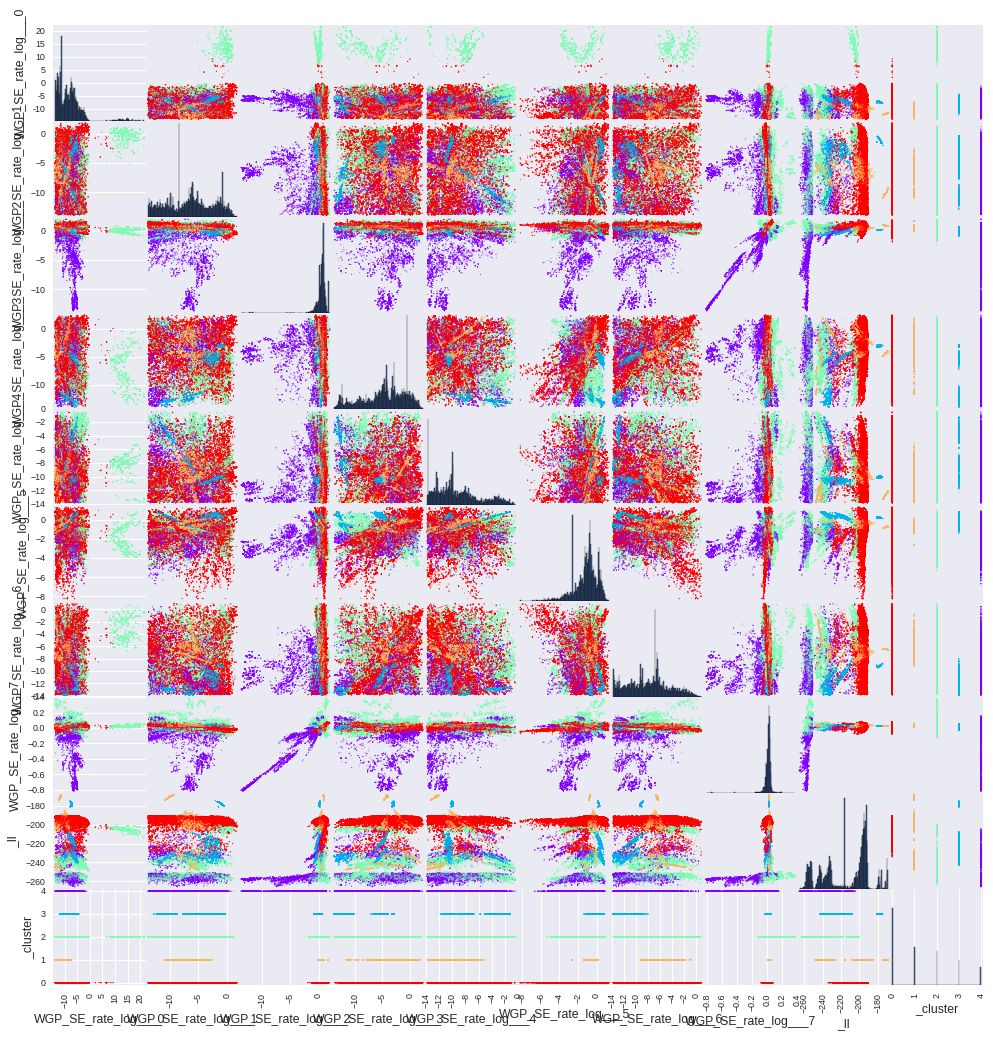

In [14]:
g3.scatter_datatrace(datatrace, regex='rate|_ll|_cluster')

In [15]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
ll[67097]                     -0.862621                     0.393452   
ll[17104]                     -0.622117                    -0.178521   
ll[137390]                    -0.782216                     0.458407   
ll[29417]                     -0.820255                     0.401254   
ll[177244]                    -0.811337                     0.552472   

            WGP_BoxCoxLinear_shift  WGP_Noise_var_log_  WGP_SE_rate_log___0  \
ll[67097]                -7.000000            0.755054           -11.672995   
ll[17104]                -6.999999            0.424439            -7.816241   
ll[137390]               -6.000001            0.678082           -12.811189   
ll[29417]                -6.000000            0.603764             8.594371   
ll[177244]               -6.000003            0.697471            -6.921276   

            WGP_SE_rate_log___1  WGP_SE_rate_log___2  WGP_SE_rate_log___3  \
ll[67097]             -9.340691             0.832664            -4.126732   
ll[17104]             -1.987572             0.222774            -2.979427   
ll[137390]            -8.465646             0.810645            -4.593546   
ll[29417]             -2.186137             0.741432            -6.914638   
ll[177244]            -5.574552             0.212762            -5.815607   

            WGP_SE_rate_log___4  WGP_SE_rate_log___5  WGP_SE_rate_log___6  \
ll[67097]            -12.122416            -0.685643            -6.595927   
ll[17104]            -10.109854             0.147569            -8.795568   
ll[137390]           -11.923059            -0.869937            -7.321804   
ll[29417]            -12.014171            -0.857623            -3.441870   
ll[177244]            -9.332759            -1.884114           -10.486927   

            WGP_SE_rate_log___7  WGP_SE_var_log_  WGP_Bias_Bias  _nchain  \
ll[67097]              0.026105         4.307195      -4.197917        6   
ll[17104]              0.025801         6.674207     -10.359416        1   
ll[137390]             0.020518         4.461918      -4.975571       13   
ll[29417]              0.039574         4.575549       2.332305        2   
ll[177244]            -0.006087         6.802937     -11.979869       17   

            _niter  _burnin  _outlayer         _ll  _cluster  
ll[67097]     7097     True       True -168.925217         1  
ll[17104]     7104     True       True -174.585495         3  
ll[137390]    7390     True       True -190.728394         0  
ll[29417]     9417     True       True -199.846085         2  
ll[177244]    7244     True       True -204.734207         4

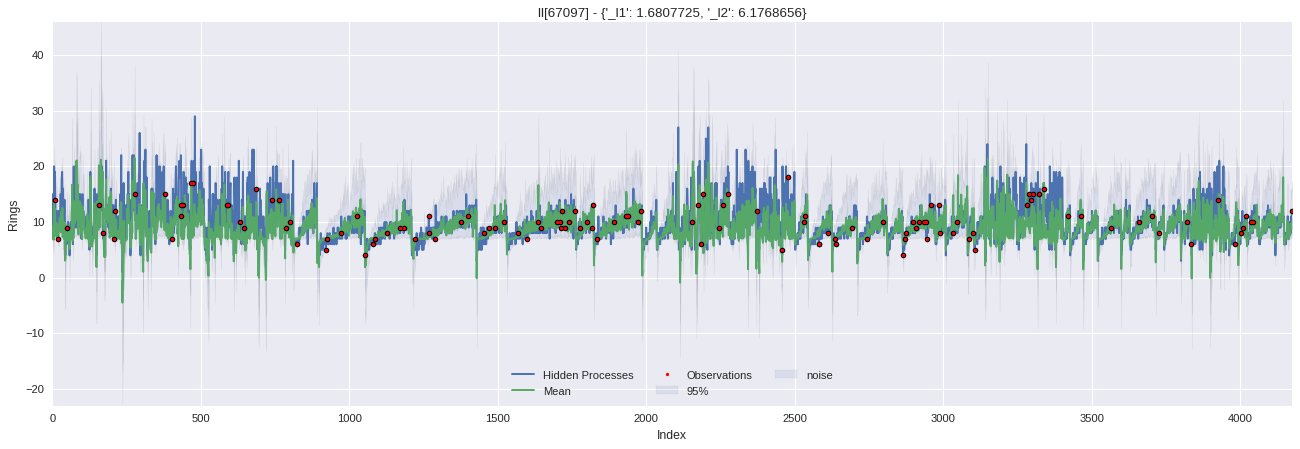

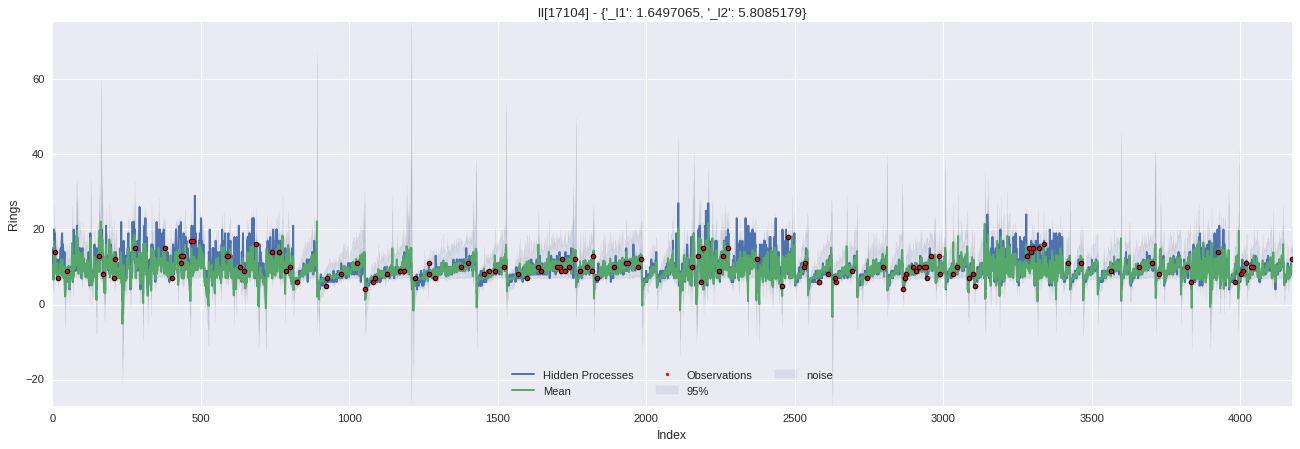

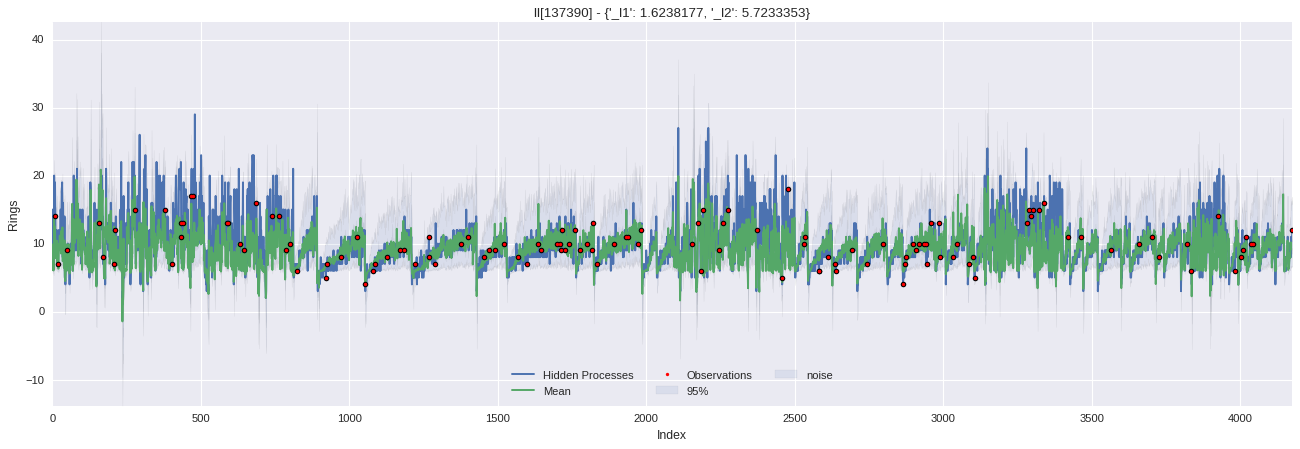

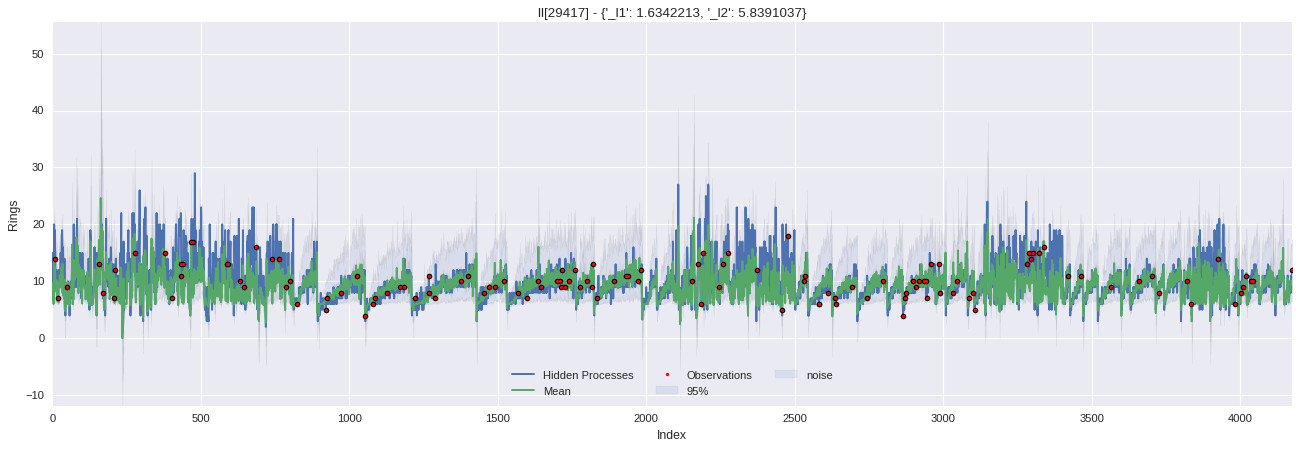

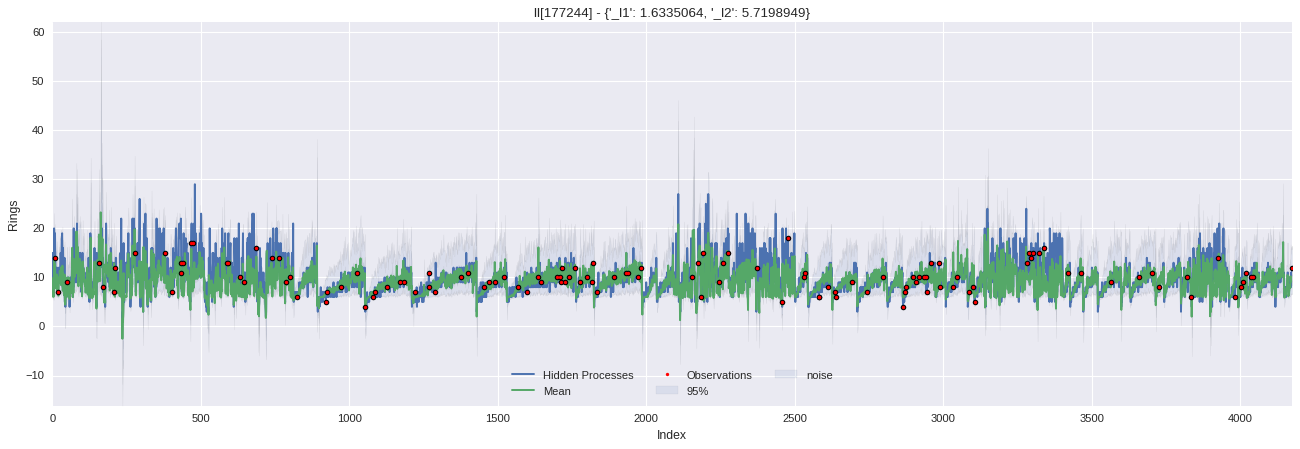

In [16]:
gp.plot_datatrace(candidates)

## Fixing Parameters

In [8]:
gp.active.transformations

{'WGP_BoxCoxLinear_power': <theano.compile.function_module.Function at 0x7fbedbaf82b0>,
 'WGP_BoxCoxLinear_power_log_': <theano.compile.function_module.Function at 0x7fbee0339c18>,
 'WGP_BoxCoxLinear_scale': <theano.compile.function_module.Function at 0x7fbece0d4dd8>,
 'WGP_BoxCoxLinear_scale_log_': <theano.compile.function_module.Function at 0x7fbece0d7c50>,
 'WGP_Noise_var': <theano.compile.function_module.Function at 0x7fbece0cc358>,
 'WGP_Noise_var_log_': <theano.compile.function_module.Function at 0x7fbece0c3cf8>,
 'WGP_SE_rate': <theano.compile.function_module.Function at 0x7fbece32fa58>,
 'WGP_SE_rate_log_': <theano.compile.function_module.Function at 0x7fbecf5a9780>,
 'WGP_SE_var': <theano.compile.function_module.Function at 0x7fbed034fb38>,
 'WGP_SE_var_log_': <theano.compile.function_module.Function at 0x7fbecf5c60f0>}

In [9]:
dt = datatrace.sample(10)
dt

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
24751                     -0.865141                     0.200053   
259823                    -0.556551                     0.255693   
195070                    -0.554496                     0.474069   
198237                    -0.538674                     0.571910   
205507                    -0.704046                     0.797513   
146443                    -0.688943                    -0.005291   
61941                     -0.886195                     0.443212   
90264                     -0.553131                     0.408151   
31606                     -1.056227                     1.754263   
186748                    -0.557461                     1.055695   

        WGP_BoxCoxLinear_shift  WGP_Noise_var_log_  WGP_SE_rate_log___0  \
24751                -6.000001            0.543515            13.102445   
259823               -9.000050            1.102362           -11.213254   
195070               -5.000058            0.482678           -12.611123   
198237               -5.000076            0.484430           -13.304612   
205507               -5.999999            0.961185            -5.741090   
146443               -7.000016            0.591191            -9.416475   
61941                -7.000000            0.774382           -11.925877   
90264                -6.000761            0.754148            -7.246027   
31606                -3.593499           -0.042713           -10.529050   
186748               -5.000144            1.200008            -1.857685   

        WGP_SE_rate_log___1  WGP_SE_rate_log___2  WGP_SE_rate_log___3  \
24751             -0.423244             0.392203           -12.099672   
259823            -8.386440             1.690926            -0.487390   
195070            -5.349929             0.654643            -6.846354   
198237            -6.052020             0.786445            -2.248904   
205507            -7.055579             0.414092             1.498710   
146443            -6.634208             0.376427            -1.718984   
61941             -9.814550             0.884348            -4.323649   
90264             -0.407766             0.695463            -2.249057   
31606             -3.032059            -0.050578           -12.768131   
186748            -4.193904             0.784732            -8.768416   

        WGP_SE_rate_log___4  WGP_SE_rate_log___5  WGP_SE_rate_log___6  \
24751             -8.230922            -3.548154            -5.032595   
259823           -13.727525            -2.609538            -6.840279   
195070           -12.894319            -1.177230            -6.876923   
198237           -11.957223            -1.280508            -3.094852   
205507           -10.227060            -0.210047            -3.148266   
146443            -9.233072            -0.253608            -6.521887   
61941            -12.426237            -0.740418            -6.517181   
90264             -6.535351            -2.127076            -3.919074   
31606            -11.953647            -0.492238           -11.775966   
186748            -2.918462            -1.112838           -10.347648   

        WGP_SE_rate_log___7  WGP_SE_var_log_  WGP_Bias_Bias  _nchain  _niter  \
24751              0.030948         5.833990      -7.003879        2    4751   
259823             0.030078         4.131723      -6.380241       25    9823   
195070             0.035265         4.837315      -5.892586       19    5070   
198237             0.036130         4.672971      -4.399970       19    8237   
205507             0.000381         5.320180      -1.484652       20    5507   
146443             0.038058         4.132102      -6.626963       14    6443   
61941              0.025317         4.256418      -3.818238        6    1941   
90264             -0.008884         4.406244      -6.337591        9     264   
31606             -0.043310         6.082234       9.123565        3    1606   
186748            -0.0122

In [10]:
gp.active.transformations

{'WGP_BoxCoxLinear_power': <theano.compile.function_module.Function at 0x7fbedbaf82b0>,
 'WGP_BoxCoxLinear_power_log_': <theano.compile.function_module.Function at 0x7fbee0339c18>,
 'WGP_BoxCoxLinear_scale': <theano.compile.function_module.Function at 0x7fbece0d4dd8>,
 'WGP_BoxCoxLinear_scale_log_': <theano.compile.function_module.Function at 0x7fbece0d7c50>,
 'WGP_Noise_var': <theano.compile.function_module.Function at 0x7fbece0cc358>,
 'WGP_Noise_var_log_': <theano.compile.function_module.Function at 0x7fbece0c3cf8>,
 'WGP_SE_rate': <theano.compile.function_module.Function at 0x7fbece32fa58>,
 'WGP_SE_rate_log_': <theano.compile.function_module.Function at 0x7fbecf5a9780>,
 'WGP_SE_var': <theano.compile.function_module.Function at 0x7fbed034fb38>,
 'WGP_SE_var_log_': <theano.compile.function_module.Function at 0x7fbecf5c60f0>}

In [11]:
fix_params = {'WGP_Noise_var' : 0.1,
             'WGP_BoxCoxLinear_power_log_': 0.1}
fix_transform = gp.active.transform_params(fix_params, to_dict=True, to_transformed=True, complete=False)
fix_transform

{'WGP_BoxCoxLinear_power_log_': 0.1,
 'WGP_Noise_var_log_': array(-2.3025851249694824, dtype=float32)}

In [12]:
dt.WGP_Noise_var_log_ = fix_transform.WGP_Noise_var_log_
dt

WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
24751                     -0.865141                     0.200053   
259823                    -0.556551                     0.255693   
195070                    -0.554496                     0.474069   
198237                    -0.538674                     0.571910   
205507                    -0.704046                     0.797513   
146443                    -0.688943                    -0.005291   
61941                     -0.886195                     0.443212   
90264                     -0.553131                     0.408151   
31606                     -1.056227                     1.754263   
186748                    -0.557461                     1.055695   

        WGP_BoxCoxLinear_shift  WGP_Noise_var_log_  WGP_SE_rate_log___0  \
24751                -6.000001           -2.302585            13.102445   
259823               -9.000050           -2.302585           -11.213254   
195070               -5.000058           -2.302585           -12.611123   
198237               -5.000076           -2.302585           -13.304612   
205507               -5.999999           -2.302585            -5.741090   
146443               -7.000016           -2.302585            -9.416475   
61941                -7.000000           -2.302585           -11.925877   
90264                -6.000761           -2.302585            -7.246027   
31606                -3.593499           -2.302585           -10.529050   
186748               -5.000144           -2.302585            -1.857685   

        WGP_SE_rate_log___1  WGP_SE_rate_log___2  WGP_SE_rate_log___3  \
24751             -0.423244             0.392203           -12.099672   
259823            -8.386440             1.690926            -0.487390   
195070            -5.349929             0.654643            -6.846354   
198237            -6.052020             0.786445            -2.248904   
205507            -7.055579             0.414092             1.498710   
146443            -6.634208             0.376427            -1.718984   
61941             -9.814550             0.884348            -4.323649   
90264             -0.407766             0.695463            -2.249057   
31606             -3.032059            -0.050578           -12.768131   
186748            -4.193904             0.784732            -8.768416   

        WGP_SE_rate_log___4  WGP_SE_rate_log___5  WGP_SE_rate_log___6  \
24751             -8.230922            -3.548154            -5.032595   
259823           -13.727525            -2.609538            -6.840279   
195070           -12.894319            -1.177230            -6.876923   
198237           -11.957223            -1.280508            -3.094852   
205507           -10.227060            -0.210047            -3.148266   
146443            -9.233072            -0.253608            -6.521887   
61941            -12.426237            -0.740418            -6.517181   
90264             -6.535351            -2.127076            -3.919074   
31606            -11.953647            -0.492238           -11.775966   
186748            -2.918462            -1.112838           -10.347648   

        WGP_SE_rate_log___7  WGP_SE_var_log_  WGP_Bias_Bias  _nchain  _niter  \
24751              0.030948         5.833990      -7.003879        2    4751   
259823             0.030078         4.131723      -6.380241       25    9823   
195070             0.035265         4.837315      -5.892586       19    5070   
198237             0.036130         4.672971      -4.399970       19    8237   
205507             0.000381         5.320180      -1.484652       20    5507   
146443             0.038058         4.132102      -6.626963       14    6443   
61941              0.025317         4.256418      -3.818238        6    1941   
90264             -0.008884         4.406244      -6.337591        9     264   
31606             -0.043310         6.082234       9.123565        3    1606   
186748            -0.0122

In [13]:
keys = ['WGP_Noise_var_log_', 'WGP_SE_rate_log___2']
gp.active.fix_vars(dt, keys)

In [14]:
gp.active.sampling_dims

[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13]

In [15]:
gp.active.fixed_dims

[3, 6]

In [61]:
g3.chains_to_datatrace(gp, g3.datatrace_to_chains(gp, dt, flat=True), ll=dt._ll)

WGP_BoxCoxLinear_power_log_
WGP_BoxCoxLinear_scale_log_
WGP_BoxCoxLinear_shift
WGP_Noise_var_log_
WGP_SE_rate_log___0
WGP_SE_rate_log___1
WGP_SE_rate_log___2
WGP_SE_rate_log___3
WGP_SE_rate_log___4
WGP_SE_rate_log___5
WGP_SE_rate_log___6
WGP_SE_rate_log___7
WGP_SE_var_log_
WGP_Bias_Bias
_nchain
_niter
_burnin
_outlayer
_ll


WGP_BoxCoxLinear_power_log_  WGP_BoxCoxLinear_scale_log_  \
0                    -0.553721                     0.436224   
1                    -0.526817                     0.545134   
2                    -0.605735                     0.247318   
3                    -0.632923                     0.631551   
4                    -0.482889                     0.417869   
5                    -0.927610                     1.491189   
6                    -0.648039                    -0.225426   
7                    -3.312440                     7.938274   
8                    -0.494489                     0.329831   
9                    -0.886195                     0.443212   

   WGP_BoxCoxLinear_shift  WGP_Noise_var_log_  WGP_SE_rate_log___0  \
0               -5.000001                0.02            -9.313566   
1               -5.000000                0.02           -12.761076   
2               -5.999569                0.02            -4.495855   
3               -6.000182                0.02           -11.818403   
4               -4.999928                0.02           -12.559643   
5               -2.565676                0.02            -4.970314   
6               -7.000965                0.02            -6.194469   
7               -0.402221                0.02            -7.919959   
8               -5.000000                0.02           -13.795795   
9               -7.000000                0.02           -11.925877   

   WGP_SE_rate_log___1  WGP_SE_rate_log___2  WGP_SE_rate_log___3  \
0            -6.676497             0.563148           -12.480001   
1            -9.841252             0.779303            -2.682765   
2            -2.182548             0.707625            -1.057961   
3           -13.529219             0.363761            -2.244970   
4           -12.091519             0.874236            -2.644833   
5           -12.843940             0.095371           -13.183960   
6            -2.768447            -0.392342            -5.327146   
7           -12.714695            -4.451646            -3.890778   
8            -7.232888             0.839003            -3.980669   
9            -9.814550             0.884348            -4.323649   

   WGP_SE_rate_log___4  WGP_SE_rate_log___5  WGP_SE_rate_log___6  \
0            -8.016955            -0.547268           -13.646235   
1            -6.519477            -0.442332            -5.459305   
2            -5.336401            -1.404568            -4.707752   
3            -8.878868            -0.738676            -7.536516   
4            -1.760355             0.008701            -8.234644   
5            -8.655243             0.088269           -12.670614   
6           -10.467570             0.479029           -11.117248   
7           -10.501009            -3.549212            -9.311989   
8            -9.217249            -0.986006            -7.162150   
9           -12.426237            -0.740418            -6.517181   

   WGP_SE_rate_log___7  WGP_SE_var_log_  WGP_Bias_Bias  _nchain  _niter  \
0             0.009118         4.925085      -5.001589        0       0   
1             0.013199         4.531757      -2.248248        0       1   
2            -0.000243         6.146744      -5.555817        0       2   
3             0.028798         4.012095      -9.349594        0       3   
4            -0.004148         4.775184      -1.349936        0       4   
5             0.021288         3.307895       1.660334        0       5   
6             0.040215         7.042611     -12.602558        0       6   
7            -0.084980         6.077631      16.095793        0       7   
8             0.026260         5.151558      -5.268179        0       8   
9             0.025317         4.256418      -3.818238        0       9   

   _burnin  _outlayer         _ll  
0    False      False -232.373184  
1    False       True -232.044922  
2    False      False -230.780746  
3    False      False -226.792114  
4    False      False -242.721527 

In [ ]:
gp.fix_datatrace(dt, keys=['WGP_BoxCoxLinear_shift', 'WGP_Noise_var_log_'])

In [47]:
gp.active.fixed_dims

AttributeError: 'GraphicalModel' object has no attribute 'fixed_dims'

In [48]:
gp.active.fixed_keys

AttributeError: 'GraphicalModel' object has no attribute 'fixed_keys'

In [49]:
gp.active.sampling_dims

AttributeError: 'GraphicalModel' object has no attribute 'sampling_dims'

In [51]:
gp.active.fix_params

AttributeError: 'GraphicalModel' object has no attribute 'fix_params'

## Fix/Marginalise Parameters